<center><h1>Ejemplo Transformada Z</h1></center>

Tenemos la siguiente ecuación de diferencia que representa un sistema digital LTI:

 $$ y(n) = 0.75.y(n-1) + x(n) + x(n-1)  $$
 
En lógica programable los retrasos se mapean como FF o elementos de memoria.
Para los sistemas digitales la propiedad de corrimiento en tiempo de la transformada Z:
 
 $$ x(n-k) <------> z^{-k}X(z) $$
 
Realizamos la transformada Z a ambos lados de la igualdad.
 
 $$ Y(z) = 0.75.z^{-1}.Y(z) + X(z) + z^{-1}.X(z)  $$
 
 $$ Y(z).(1 - 0.75.z^{-1}) = X(z).(1 + z^{-1})  $$
 
 $$ \frac{Y(z)}{X(z)} = H(z) =\frac{1 + z^{-1}}{1 - 0.75.z^{-1}} = \frac{N(z)}{D(z)}  $$
 
Para saber el funcionamiento del sistema podemos calcular las singularidades de N(Z) y D(Z)
 

**Calculamos las singularidades de los polinomios N(z) y D(z)**. 
Las raices de **N(z)** son los ceros. Las raices de **D(z)** son los polos.
* En las bibliografía los coeficiente de **N(z)** tambien se conoce como **b**.
* En las bibliografía los coeficiente de **D(z)** tambien se conoce como **a**.


b = $[1,1]$

a = $[1,-0.75]$

Con la función *roots* de numpy podemos sacar las singularidades.

Recordar que para un polinomio de coefciente reales las raices son reales, o complejas conjugadas.


In [9]:
import numpy as np
#Primero describimos a los polinomios.
b = [1,1]    
a = [1,-0.75]

#Polos y ceros
p = np.roots(a)
z = np.roots(b)

print("El polo esta ubicado en z = {}".format(p[0]))
print("El zero esta ubicado en z = {}".format(z[0]))


El polo esta ubicado en z = 0.75
El zero esta ubicado en z = -1.0


**Como los polos estan dentro del circulo unitario podemos decir que el sistema es estable.**

Para verlo mas claramente podemos usar la funcion zplane que declaramos mas abajo.

In [11]:
#Declaracion de importaciones y de la funcion para dibujar el zplane
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

#No tenemos zplane declara da con lo cual directamnete ubicamos esta implementacion en stackoverflow.
# No ta buscar si hau algo maejor documentado
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

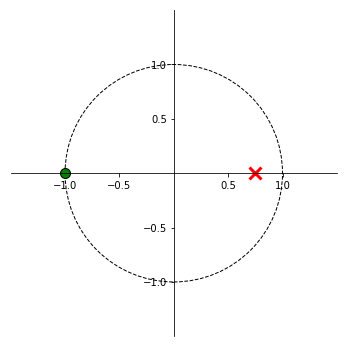

In [13]:
#Teniendo como parametro a b y a que son los polinomios 
fig = plt.figure(figsize=(10,6))
z,p,k=zplane(b,a)

Una vez tenida la transformada Z y sus polinomios b,a podemos calcular su respuesta en frecuencia.
En python tenemos la función **freqz** de numpy. 

Esta funcion evalua la función de transferencia en el circulo unitario $ e^{jw} $

![PDS_CLASE_4_1](./PDS_CLASE_4_1.PNG)
[Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html)

Recordar que la respuesta en frecuencia nos vas a dar la respuesta del sistema para disintas excitaciones armónicas.}

Tambien tener en mente que el resultado es complejo, con locual para hacer un gráfico siempre es necesario obtener maginitud y fase.

Cantidad de puntos calculados:512
Cantidad de puntos calculados:8192


(-0.1570604579196411,
 3.298269616312463,
 -0.39976990287908354,
 8.399989042994243)

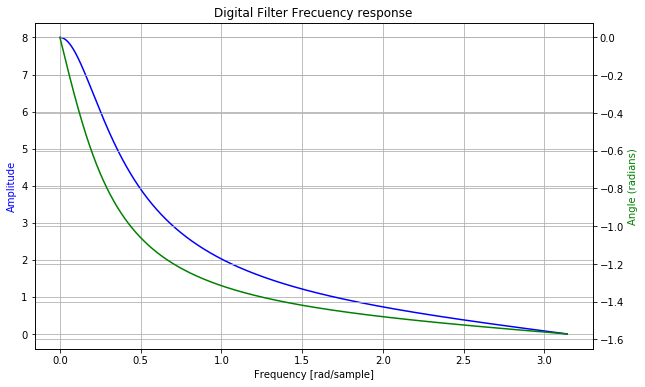

In [24]:
from scipy import signal
#Sacamos la respuesta en frecuencia

#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)
#Como esta respuesta en teoría es continua, podemos obtener infinitos puntos.
print("Cantidad de puntos calculados:{}".format(np.size(w)))

#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a,worN=8192)
#Como esta respuesta en teoría es continua, podemos obtener infinitos puntos.
print("Cantidad de puntos calculados:{}".format(np.size(w)))

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
ax2.grid()
ax1.axis('tight')

Algunas aclaraciones del sistema lineal anteior.
* Tener en cuenta que esta transferencia es IIR ya que tiene polos y su respuesta al impulso es infinita.
* El metodo que habiamos visto de la convolución con la respuesta al impulso parece inviable para este sistema.

Por lo tanto  en Python tenemos metodos para realizar el filtrado de una señal cualquiera sea una vez obtenida la transformada Z de un sistema.
Esta esta en scipy y es **lfilter** tener en cuenta que como antes tenemos que pasar los polinomios de b y a.

[Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)


El tamaño de la señal de salida= 512


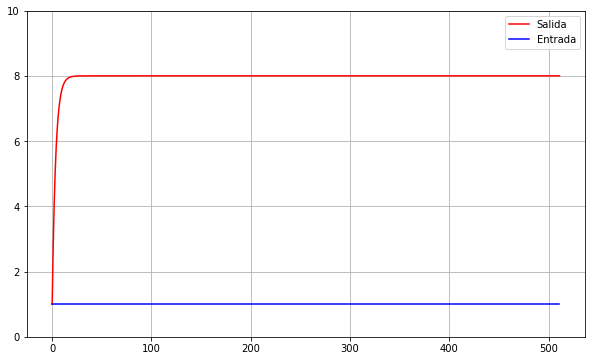

In [59]:
#Excitemos el sistema con una continua, para nuestro caso de lo que vimos de la respuesta en frecuencia deberia amplificar 8 veces.

#Tomemos 512 muestros.
N = 512
xx = np.ones(512)
#Esta funcion permite que uno pueda indicarle las condiciones iniciales.
yy = signal.lfilter(b,a,xx)

print("El tamaño de la señal de salida= {}".format(np.size(yy)))

plt.subplots(figsize=(10,6))
plt.plot(yy,'r')
plt.grid()
plt.plot(xx,'b')
plt.ylim(0,10)
plt.legend(['Salida','Entrada'])


**Al principio tenemos un transitorio. Podemos configurar lfilter para tener distintas condiciones iniciales y de esta manera obtener distintos transitorios. Eventaulmente este se extingue y la salida del sistema queda determinada como lo que obtuvimos de la H($e^{jw}$)**

Por ejemplo trabajemos para w = 1.0, esperamos que en amplitud el filtro amplifique **2 veces aproximadamente**.

![PDS_CLASE_4_2](./PDS_CLASE_4_2.PNG)

El tamaño de la señal de salida= 512
RMS INPUT: 0.71 RMS OUTPUT: 1.43 OUTPUT/INPUT = 2.03


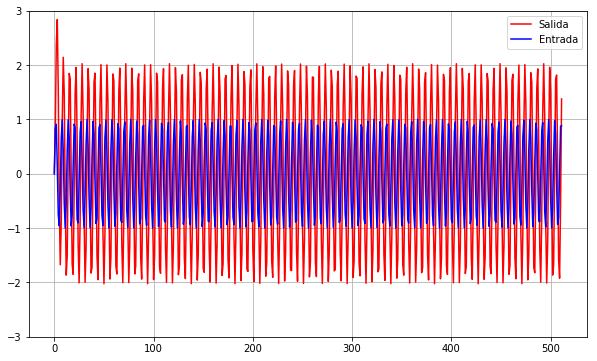

In [58]:
#Tomemos 512 muestros.
N = 512
tt = np.linspace(0,N,N,endpoint=False)
xx = np.sin(1.0*tt)
#Esta funcion permite que uno pueda indicarle las condiciones iniciales.
yy = signal.lfilter(b,a,xx)

print("El tamaño de la señal de salida= {}".format(np.size(yy)))

plt.subplots(figsize=(10,6))
plt.plot(yy,'r')
plt.grid()
plt.plot(xx,'b')
plt.ylim(-3,3)
plt.legend(['Salida','Entrada'])

#Una buena manera de calcular como sabemos que tenemos solo un tono a la salida podemos sacar el valor rms.
rms_input  = np.sqrt(np.mean(xx**2))
rms_output = np.sqrt(np.mean(yy**2))

print("RMS INPUT: %2.2f RMS OUTPUT: %2.2f OUTPUT/INPUT = %2.2f" % (rms_input,rms_output,rms_output/rms_input))

### Señal de chirp
Una señal de chirp es aquella en la cual definimos una señal como:

$$ x(t) = sin(\Phi(t)) $$

Lo que podemos decir tambien es que la frecuencia instantanea:

$$ w(t) = \frac{d\Phi(t)}{dt}, f(t) = \frac{w(t)}{2\pi} $$

Lo importante que podemos decir es que esta señal recorre todas las frecuencias, lo cual excitando un sistema LTI con este tipo de señal podemos ver la transferencia del sistema.

Existen de distintos tipos:
* Lineales
    $$ f(t) = \frac{f_1 - f_0}{T} $$
    * $f_1$  es la frecuencia final, $f_0$ es la frecuencia inicial y T es el tiempo para ir de $f_0$ a $f_1$
* Exponencial
* Cuadraticos
* Logaritmiticos.


Por ejemplo en python tenemos *chirp* en scipy, para poder generar estas señales.
[Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html)

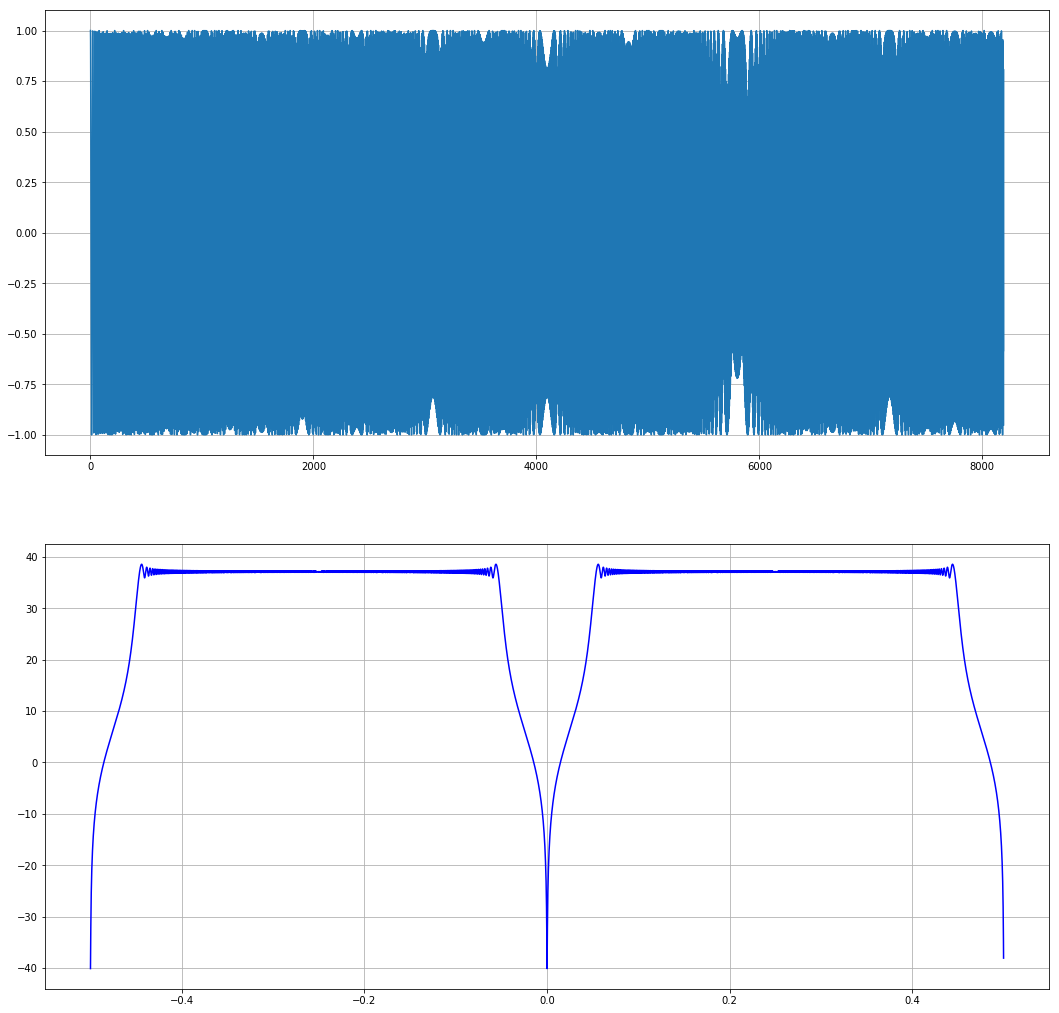

In [102]:
N = 8192
T_S = 1.0
tt = np.linspace(0,N,N,endpoint=False)
f_0 = 0.05
f_1 = 0.45

xx = signal.chirp(tt,f0 = f_0,f1 = f_1,t1 = N,method = 'linear')

fig,ax = plt.subplots(2,1,figsize=(18,18))
ax[0].plot(tt,xx)
ax[0].grid()

#Sacamos el eje de frecuencias
eje_f = np.fft.fftfreq(np.size(tt),T_S)

#Sacamos el contenido en frecuencia de esta señal
X = 20*np.log10(np.abs(np.fft.fft(xx)))
ax[1].plot(np.fft.fftshift(eje_f),np.fft.fftshift(X),'b')

plt.grid()
plt.show()


### Excitemos al sistema con esta señal

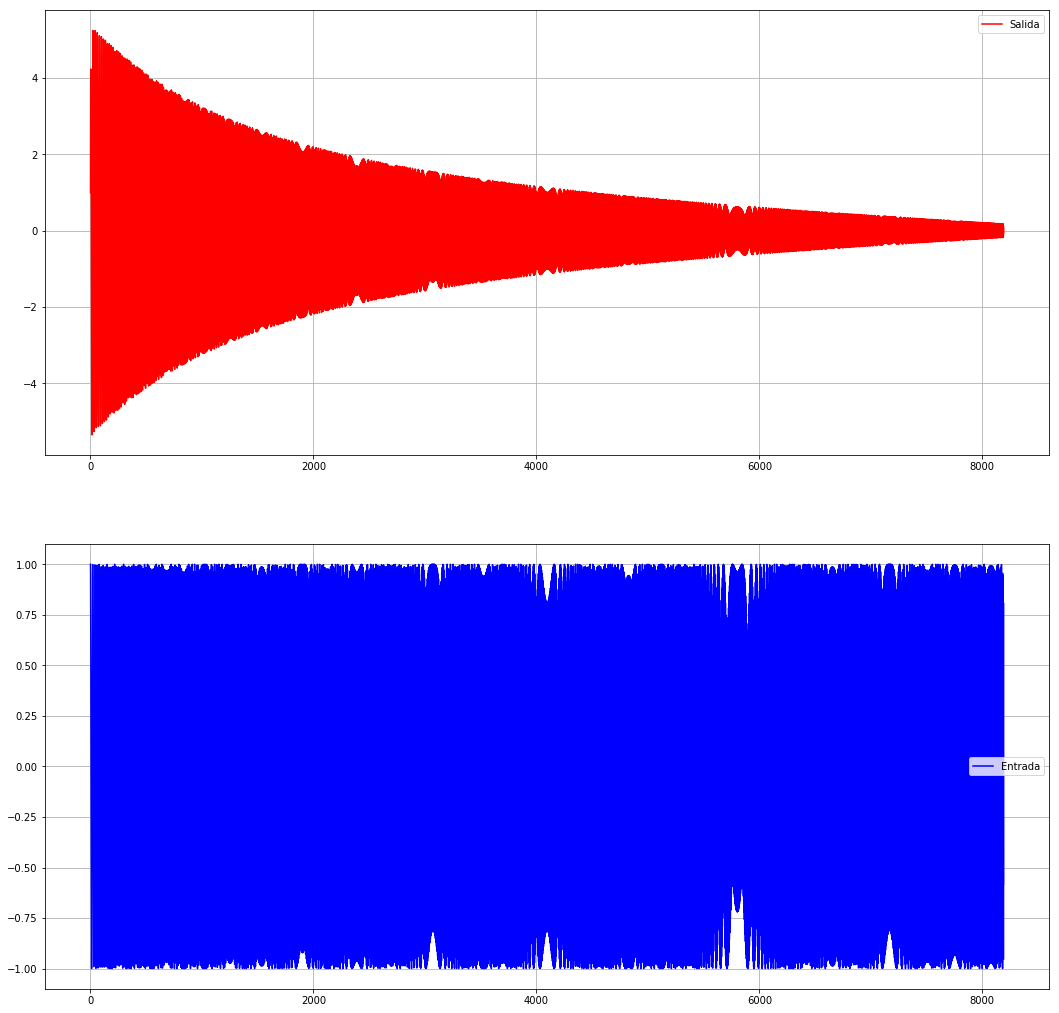

In [103]:
yy = signal.lfilter(b,a,xx)

fig,ax = plt.subplots(2,1,figsize=(18,18))
ax[0].plot(yy,'r')
ax[0].grid()
ax[0].legend(['Salida'])
ax[1].plot(xx,'b')
ax[1].grid()
ax[1].legend(['Entrada'])